In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1') 

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4772,ham,Ok then u tell me wat time u coming later lor.,NaN,NaN,NaN
3215,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
1245,ham,Hello which the site to download songs its urg...,NaN,NaN,NaN
3795,ham,They have a thread on the wishlist section of ...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation 
# 6. Impovement
# 7. Deployment

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# percentage of missing data of  Unnamed:2 , Unnamed:3 and Unnamed:4 of dataset
round(df[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].isnull().sum()/df.shape[0]*100, 2)

Unnamed: 2    99.10
Unnamed: 3    99.78
Unnamed: 4    99.89
dtype: float64

In [8]:
# drop last 3 cols 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
197,ham,is your hamster dead? Hey so tmr i meet you at...
4310,ham,It so happens that there r 2waxsto do wat you ...
3993,ham,I love to cuddle! I want to hold you in my str...
1390,ham,"I wonder how you got online, my love ? Had you..."
2735,ham,I meant middle left or right?


In [10]:
# renaming the cols 
df.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)

In [11]:
df.sample(5)

,label,message
811,ham,So there's a ring that comes with the guys cos...
2930,ham,Hi' Test on &lt;#&gt; rd ....
3081,ham,"And very importantly, all we discuss is betwee..."
2963,spam,"Do you ever notice that when you're driving, a..."
1138,ham,What * u wearing?


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['label']=encoder.fit_transform(df['label'])

In [14]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
 df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

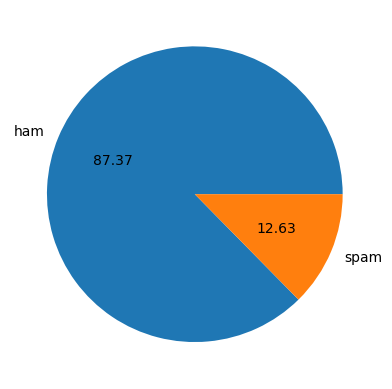

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [23]:
# Data is imbalanced

In [24]:
import nltk

In [25]:
!pip install nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\UseR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['num_characters']=df['message'].apply(len)

In [29]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# num of words 
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham 
df[df['label']== 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# spam
df[df['label']== 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

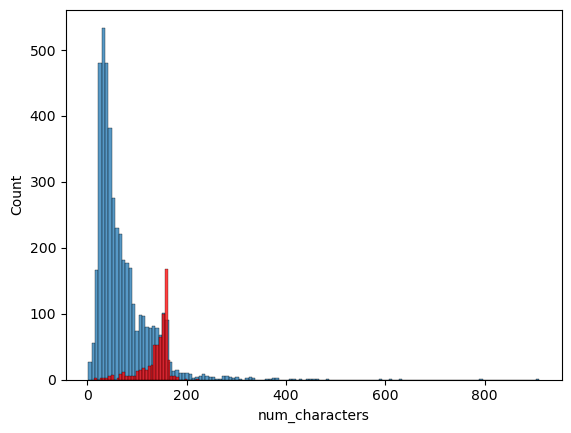

In [38]:
# plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0] ['num_characters'])
sns.histplot(df[df['label'] == 1] ['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

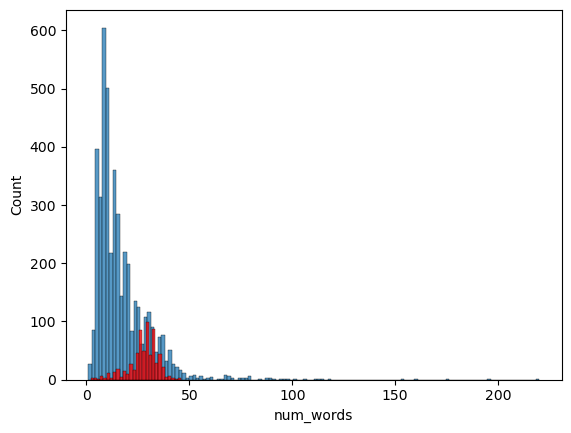

In [39]:
# plt.figure(figsize=(10, 5))
sns.histplot(df[df['label'] == 0] ['num_words'])
sns.histplot(df[df['label'] == 1] ['num_words'], color='red')

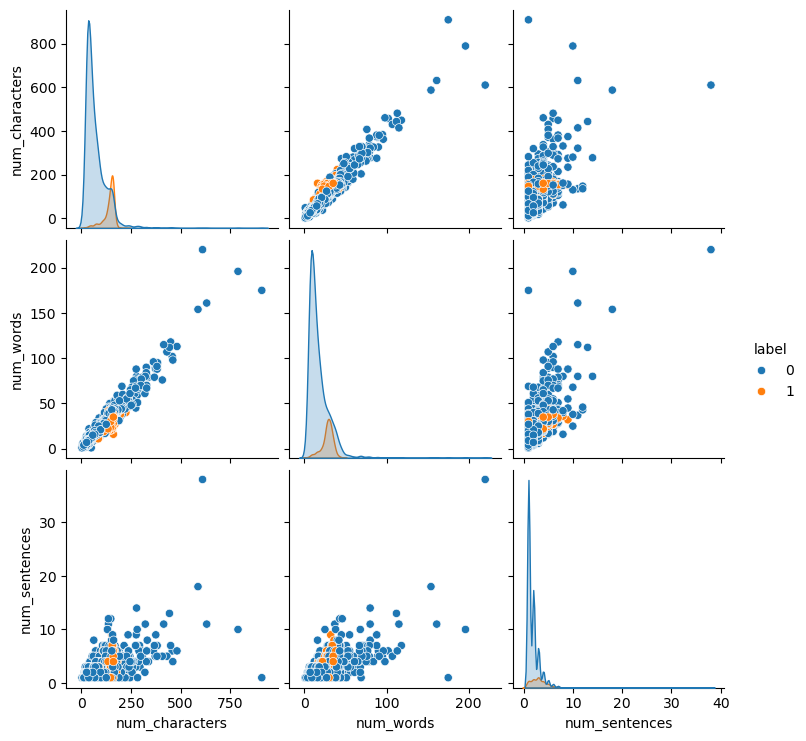

In [40]:
sns.pairplot(df, hue='label')

<Axes: >

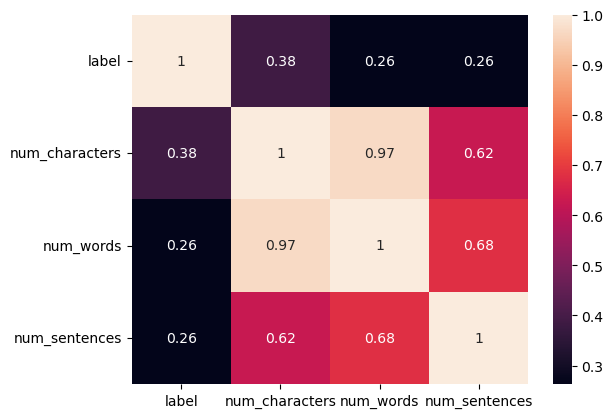

In [41]:
sns.heatmap(df[['label', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

In [42]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming 

In [43]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [44]:
def transform_text(message):
    message = message.lower()
    message = nltk.word_tokenize(message)

    y =[]
    for i in message:
        if i.isalnum():
            y.append(i)

    message = y[:]
    y.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message = y[:]
    y.clear()
    for i in message:
        y.append(ps.stem(i))

    return " ".join(y)

In [45]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
ps.stem('loving')

'love'

In [48]:
df['transformed_message'] = df['message'].apply(transform_text)

In [49]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [51]:
spam_wc = wc.generate(df[df['label']==1] ['transformed_message'].str.cat(sep=" "))

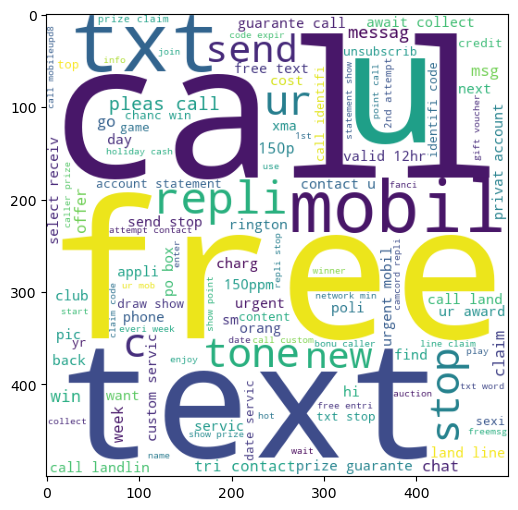

In [52]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['label']== 0] ['transformed_message'].str.cat(sep= " "))

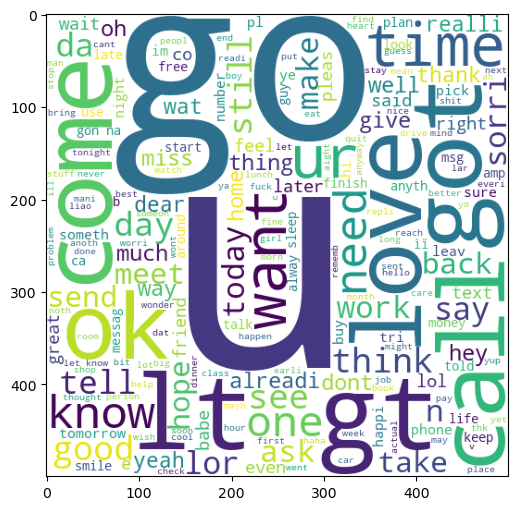

In [54]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [55]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus = []
for msg in df[df['label'] == 1] ['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

C:\Users\UseR\AppData\Local\Temp\ipykernel_7328\232083803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_freq, palette='viridis')


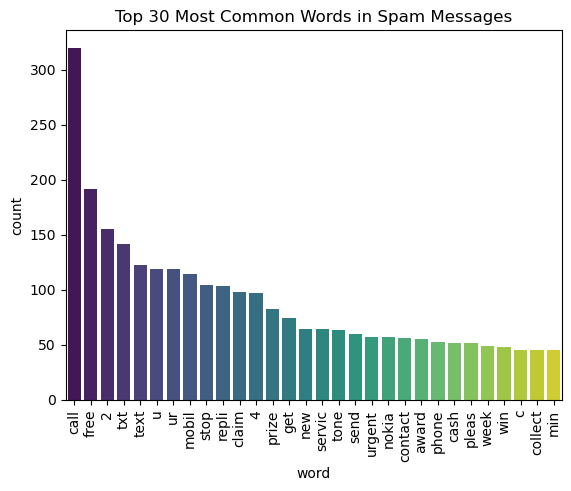

In [58]:
from collections import Counter
word_freq = Counter(spam_corpus).most_common(30)
df_freq = pd.DataFrame(word_freq, columns=['word', 'count'])

# plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_freq, palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [59]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
ham_corpus = []
for msg in df[df['label'] == 0] ['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35404

C:\Users\UseR\AppData\Local\Temp\ipykernel_7328\530636509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_freq, palette='viridis')


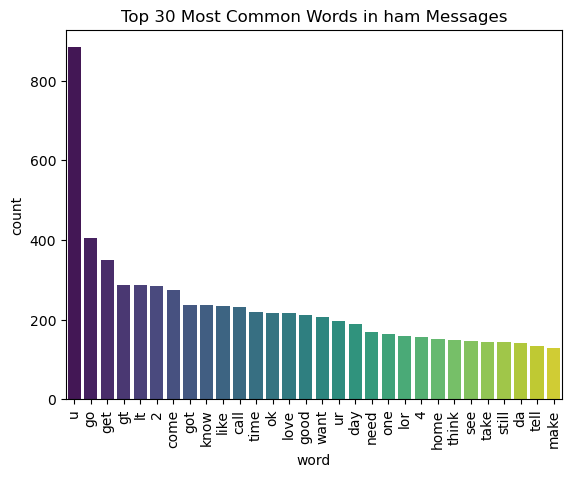

In [62]:
from collections import Counter
word_freq = Counter(ham_corpus).most_common(30)
df_freq = pd.DataFrame(word_freq, columns=['word', 'count'])

# plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_freq, palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in ham Messages')
plt.show()

In [63]:
# Text Vectorization using Bag of Words
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [134]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [135]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [136]:
X.shape

(5169, 3000)

In [137]:
y = df['label'].values

In [138]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [141]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [142]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [143]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB")
print('accuracy_score:', end=' ')
print(accuracy_score(y_test, y_pred1))
print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred1))
print('precision_score:', end=' ')
print(precision_score(y_test, y_pred1))

GaussianNB
accuracy_score: 0.8723404255319149
confusion_matrix:
[[1202  158]
 [  40  151]]
precision_score: 0.4886731391585761


In [144]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('MultinomialNB')
print('accuracy_score:', end=' ')
print(accuracy_score(y_test, y_pred2))
print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred2))
print('precision_score:', end=' ')
print(precision_score(y_test, y_pred2))

MultinomialNB
accuracy_score: 0.9716312056737588
confusion_matrix:
[[1360    0]
 [  44  147]]
precision_score: 1.0


In [145]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('BernoulliNB')
print('accuracy_score:', end=' ')
print(accuracy_score(y_test, y_pred3))
print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred3))
print('precision_score:', end=' ')
print(precision_score(y_test, y_pred3))

BernoulliNB
accuracy_score: 0.9819471308833011
confusion_matrix:
[[1358    2]
 [  26  165]]
precision_score: 0.9880239520958084


In [124]:
# tfidf --> mnb

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [147]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [148]:
clfs = {
    'NB' : mnb, 
    'LR' : lrc,
    'RF' : rfc
}

In [149]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [150]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [130]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [131]:
performance_df

,Algorithm,Accuracy,Precision
0,NB,0.955513,1.000000
2,RF,0.972276,0.993333
1,LR,0.949065,0.924242


In [132]:
# # model improve
# 1. Change the max_features parameter of TfIdf

In [151]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [153]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.955513,1.000000,0.971631,1.000000
1,RF,0.972276,0.993333,0.973565,0.974684
2,LR,0.949065,0.924242,0.952289,0.933333


In [154]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
sample = ["Congratulations! You've won a free ticket to Bahamas. Call now!"]
sample_vec = vectorizer.transform(sample)
prediction = mnb.predict(sample_vec)

print("Spam" if prediction[0] == 1 else "Ham")
